<a href="https://colab.research.google.com/github/AlexanderG40/Data-Science/blob/main/Week10_Assignment_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Use the heart attacks dataset to perform logistic regression and predict the values and evaluate the accuracy in which your model has performed.**

Load the necessary libraries

In [1]:
# Code here
import pandas as pd
import numpy as np
import seaborn as sns

Load dataset as a Pandas dataframe

In [2]:
# Code here
df = pd.read_csv("/content/heartattack_data.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.shape

(4238, 16)

In [4]:
# we look at the data types in our data
df.dtypes

,0
male,int64
age,int64
education,float64
currentSmoker,int64
cigsPerDay,float64
BPMeds,float64
prevalentStroke,int64
prevalentHyp,int64
diabetes,int64
totChol,float64


Perform Exploratory Data Analysis. You can visualize any features at this point. (Use Groupby/ summary statistics etc)

In [5]:
# Code here
summary_stats = df.describe()
summary_stats

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


What we can see on our age is that by just looking at the age the mean or the average age is 49. While, the max was 70 and the minimum was 32, at 32 it was probably an unhealthy individual. Which is why they are prone to have a higher rate of heart failure between that age range. Our BMI is also interesting because the average/mean is 25 which I believe is obese. Which is another contribution to heart disease.

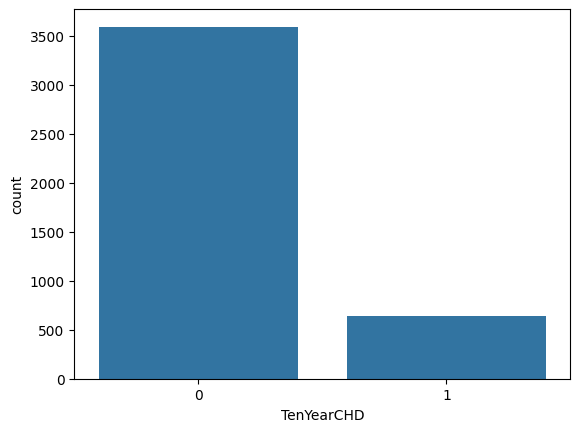

In [6]:
# Next we will visualize the distribution of our main target
# we import more librarys
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = df["TenYearCHD"])
plt.show()

We can conclude that most of our people do for a fact not have heart disease.

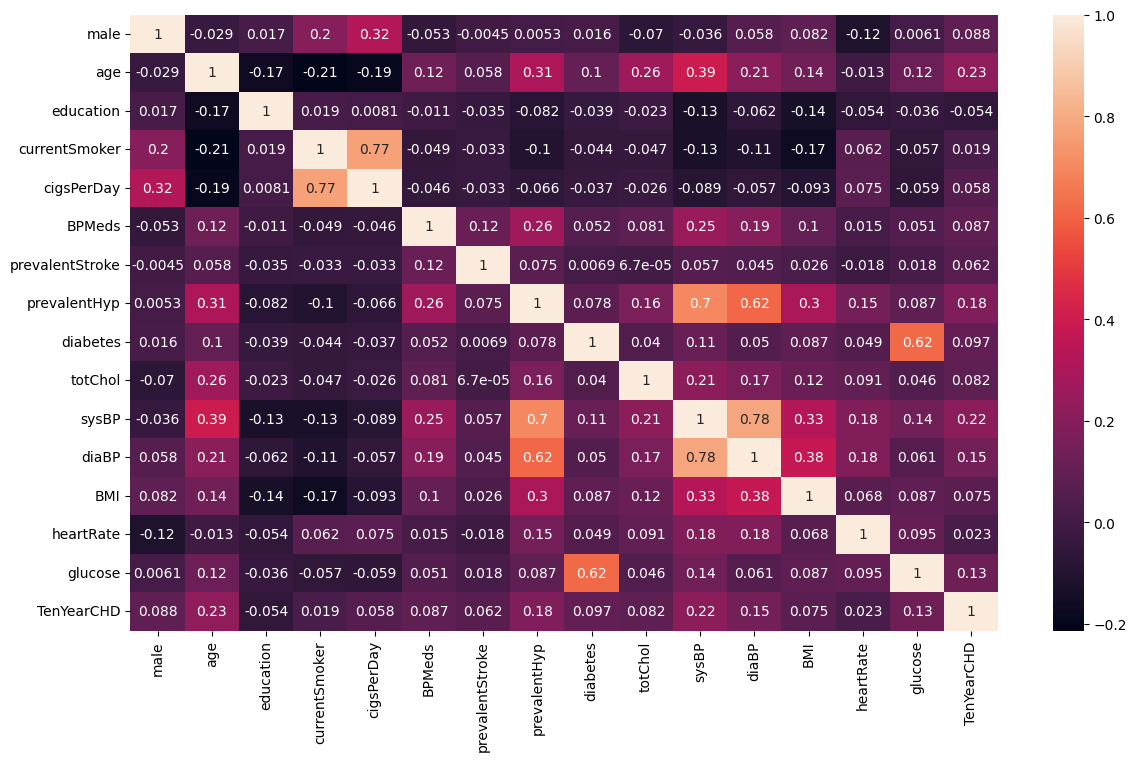

In [7]:
# we give a fig size for our data
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

As we can see the top correlation features are, diabetes and glucose. Prevalent Hyp and sysBP, and diaBP and sysBP.

In [8]:
# we check to see which features are null
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


Clean the data where necessary - null values, data types, change in feature names. Save the clean data as a new data frame for further analysis

In [9]:
# Code here
df["education"].fillna(df["education"].mode()[0], inplace=True)

<ipython-input-9-cb0f7eb94598>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["education"].fillna(df["education"].mode()[0], inplace=True)


In [10]:
# we fill our missing data with the median of our data
for col in ["cigsPerDay", "BPMeds", "totChol", "BMI", "glucose"]:
  df[col].fillna(df[col].median(), inplace=True)

<ipython-input-10-aa134bc1178b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [13]:
# we drop some of our columns which are irrelevant to our data heart disease
df.drop(columns=["heartRate"], inplace=True)

In [14]:
# we run our columns to make sure we no longer have any null values
df.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


Apply Logistic Regression model and fit the data  

(If needed, you will have to transform categorical data into dummy variables)


In [16]:
# Code here
# we train our data
from sklearn.model_selection import train_test_split

# we divide our data into two axis x and y
# x = all the independent features
# y = the traget

X = df.drop(columns = ["TenYearCHD"])
y = df["TenYearCHD"]

# One hot encoding : converting categorical values to numeric
# X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [17]:
# We create standard scaling
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
# we create a new varible
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [18]:
# we add more linear regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
# we run a test to see our data
y_test

,TenYearCHD
3188,0
764,0
3264,0
1967,0
2185,0
...,...
3303,1
4056,0
4210,0
3971,0


In [19]:
#finally we do a little bit of prediction
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

Show performance metrics - Determining the Accuracy on which the model has performed ROC, AUC

In [21]:
# Code here
# we perform accuaracy here to see how it performed
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8573113207547169

.85 means that our model gave us the right for up to 85 % which is very high for a dataset that is massive.

Show a correlation matrix between actual values vs predicted values ans explain your insights

In [24]:
# Code here
from sklearn.metrics import confusion_matrix,classification_report
consfusion_matrix =  confusion_matrix(y_test, y_pred)
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

For some reason it doesnt show it. But from class I could see that it was [718, 6], [115, 9] which are all true positives and true negatives, false positives and false negatives.

True Positives: when a model correctly predicted yes when the model answer was yes. The person had a heartattack based on some data given like high glucose, high BMI, etc...

True Negative: Pretty much the opposite of a true positive it predicts no when the answer is no.

False positive: When the model predicts yes, but the actual value is a no
False negative: When the model predicts no, but the actual value is a yes

False negatives have the highest weightage on this because our dataset should not give is a lot of false negatives otherwise something has gone badly.

**Note**:

Explain your insights at every step, what you interpret from the visualizations or at the end and conclude the outputs that show up after running your code.

In [25]:
# we run a classification report to see our dataset model
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



718: True Negative
6: False Positives
115: False Negatives
9: True Positive

With this, we can see that our model did not do the best job at giving us the right values. However, it did pretty good for the amount of information that it had.